# Script 2 - Transformation & Association metrics

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <img src="images/DataTransformation_illustration.png" alt="Data Transformation" style="max-width: 100%; height: auto;" />
</div>


# Librairies 

In [5]:
library(vegan)
library(gplots)
library(gclus)

Loading required package: permute


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: cluster

Registered S3 method overwritten by 'gclus':
  method         from 
  reorder.hclust vegan



# Loading data

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Load the Doubs fish dataset</i> </span><br/>
</div>

In [120]:
load("Doubs.RData")

# Coldiss function

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <span style="font-size: 20px;"> <i><code>coldiss()</code> is a custom made function to display a dissimilarity matrix. Execute the code in the cell below to define the new function.
 </i> </span><br/>
</div>

<div style="padding: 15px; border: 3px solid #ff9800; border-radius: 8px; background: #fff3e0; width: 380px; font-family: Arial, sans-serif; font-size: 16px; margin-top: 20px;">

  <strong>coldiss</strong><br/>
  <span style="font-style: italic; color: #ef6c00; font-size: 14px;">
    Dissimilarity Matrix Visualization<br/>
    <small>Colors and plots a dissimilarity matrix side-by-side, with and without ordering to highlight structure.</small>
  </span>
  
</div>


In [121]:
# coldiss()
# Color plots of a dissimilarity matrix, without and with ordering
#
# License: GPL-2
# Author:  Francois Gillet
#          23 August 2012 - rev. 07 June 2016

"coldiss" <- function(D,
                      nc = 4,
                      byrank = TRUE,
                      diag = FALSE) {
  require(gclus)
  
  D <- as.dist(as.matrix(D))
  
  if (max(D) > 1)
    D <- D / max(D)
  
  if (byrank) {
    spe.color <- dmat.color(1 - D, cm.colors(nc))
  }
  else {
    spe.color <- dmat.color(1 - D, byrank = FALSE, cm.colors(nc))
  }
  
  spe.o <- order.single(1 - D)
  speo.color <- spe.color[spe.o, spe.o]
  
  op <- par(mfrow = c(1, 2), pty = "s")
  
  if (diag) {
    plotcolors(
      spe.color,
      rlabels = attributes(D)$Labels,
      main = "Dissimilarity Matrix",
      dlabels = attributes(D)$Labels
    )
    plotcolors(
      speo.color,
      rlabels = attributes(D)$Labels[spe.o],
      main = "Ordered Dissimilarity Matrix",
      dlabels = attributes(D)$Labels[spe.o]
    )
  }
  else {
    plotcolors(spe.color, rlabels = attributes(D)$Labels,
               main = "Dissimilarity Matrix")
    plotcolors(speo.color,
               rlabels = attributes(D)$Labels[spe.o],
               main = "Ordered Dissimilarity Matrix")
  }
  
  par(op)
}

# Usage:
# coldiss(D = dissimilarity.matrix, nc = 4, byrank = TRUE, diag = FALSE)
# If D is not a dissimilarity matrix (max(D) > 1), then D is divided by max(D)
# nc 							number of colours (classes)
# byrank = TRUE		equal-sized classes
# byrank = FALSE	equal-length intervals
# diag = TRUE			print object labels also on the diagonal

# Example:
# coldiss(spe.dj, nc = 9, byrank = FALSE, diag = TRUE)

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <span style="font-size: 20px;"> <i>Additional useful function to display dissimilarity matrices. Execute the code in the cell below for:  <code>image.real</code>,<code>panel.hist</code>,<code>panel.cor</code>
 </i> </span><br/>
</div>

<div style="display: flex; gap: 20px; font-family: Arial, sans-serif; font-size: 16px; margin-top: 20px;">

  <div style="padding: 15px; border: 3px solid #4CAF50; border-radius: 8px; background: #e8f5e9; width: 180px; text-align: center;">
    <strong>image.real</strong><br/>
    <span style="font-style: italic; color: #2e7d32; font-size: 14px;">
      Visualization<br/>
      <small>Displays a matrix as an image with customized axes and colors.</small>
    </span>
  </div>

  <div style="padding: 15px; border: 3px solid #2196F3; border-radius: 8px; background: #e3f2fd; width: 180px; text-align: center;">
    <strong>panel.hist</strong><br/>
    <span style="font-style: italic; color: #1565c0; font-size: 14px;">
      Histogram<br/>
      <small>Shows a normalized histogram on the diagonal panels of a pairs plot.</small>
    </span>
  </div>

  <div style="padding: 15px; border: 3px solid #f44336; border-radius: 8px; background: #ffebee; width: 180px; text-align: center;">
    <strong>panel.cor</strong><br/>
    <span style="font-style: italic; color: #b71c1c; font-size: 14px;">
      Correlation<br/>
      <small>Displays the correlation coefficient between two variables in a pairs plot.</small>
    </span>
  </div>

</div>


# Useful functions -> *image.real(), panel.hist(), panel.color()*

In [122]:
# modification of image() to include row and column axis labels
image.real <- function(mat) { 
  mat <- t(mat)[,nrow(mat):1]
  image(mat, axes = FALSE, col = hcl.colors(15, palette="viridis"))
  axis(1, at = seq(0, 1, length = nrow(mat)), labels = rownames(mat), las=2)
  axis(2, at = seq(0, 1, length = ncol(mat)), labels = colnames(mat))
  box() 
}


# Function to display a histogram on the diagonal panels of a pairs plot
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y / max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

#  Function to display the correlation coefficient in the upper panels of a pairs plot
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if (missing(cex.cor)) cex.cor <- 0.8 / strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}


# 0 Simulate Data -> *rnorm(), runif(), gl(), data.frame()*

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <span style="font-size: 20px;"> <i> Sometimes it is useful to generate data with certain characteristics (e.g. for testing code).
 </i> </span><br/>
</div>

<div style="display: flex; align-items: center; gap: 20px; border: 3px solid green; padding: 10px;">
  <div style="flex: 1; max-width: 75%;">
    <h2>0.1 Generate <code>n</code> random values from a normal (Gaussian) distribution <br>
        -> <i>rnorm(<code>n</code>, <code>mean</code>,<code>sd</code>)</i></h2>
    <ul>
      <li><strong>n</strong> → Number of values to generate</li>
      <li><strong>mean</strong> → Mean (center μ ) of the distribution</li>
      <li><strong>sd</strong> → Standard deviation (spread σ) of the distribution</li>
    </ul>
  </div>
  <div style="flex: 1; max-width: 31%; border: 2px solid green; padding: 2px;"> 
    <img src="images/gaussian distribution.png" alt="rnorm function illustration" style="max-width: 100%; height: auto;">
  </div>
</div>


*Source : Normal Distribution Calculator, Inch Calculator, https://www.inchcalculator.com/normal-distribution-calculator/*

Mean of g1 :

[1] 0.0008091646

Standard deviation of g1:

[1] 0.9997192

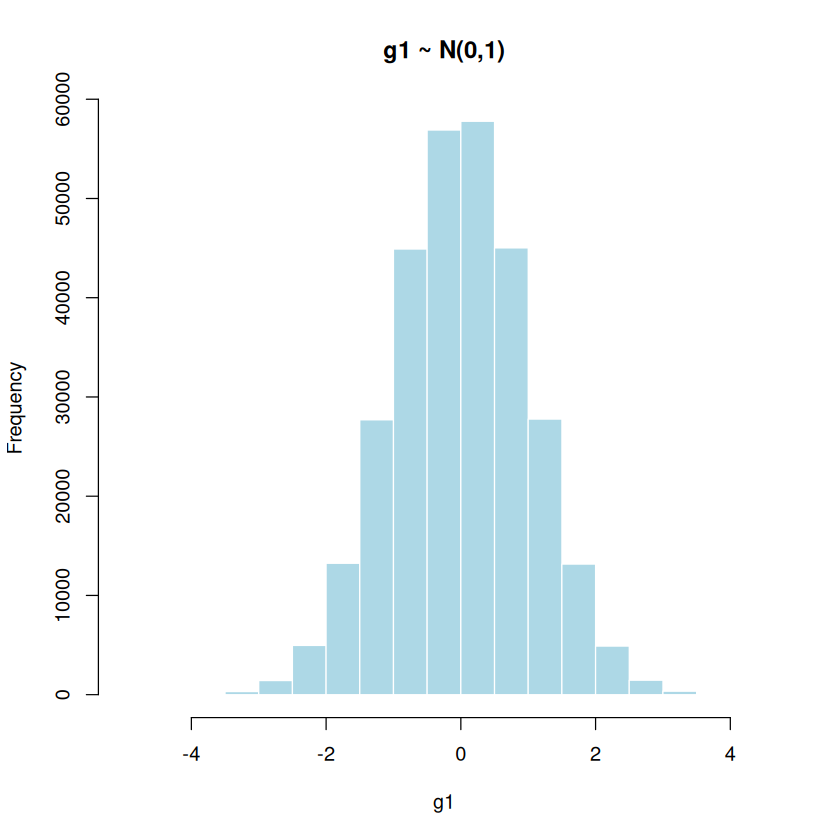

In [123]:
# Generate 300000 random values from a standard normal distribution (mean = 0, sd = 1)
g1 <- rnorm(300000, mean = 0, sd = 1)

cat("Mean of g1 :")
mean(g1)
cat("Standard deviation of g1:")
sd(g1)

# Set plot size in Jupyter Notebook (7 x 5 inches)
options(repr.plot.width = 7, repr.plot.height = 7)

# Visualize the distribution
hist(g1, main = "g1 ~ N(0,1)", col = "lightblue", border = "white")

<div style="display: flex; align-items: center; gap: 20px; border: 3px solid green; padding: 10px;">
  <div style="flex: 1; max-width: 75%;">
    <h2>0.2 Generate <code>n</code> random values from a uniform distribution <br>
        → <i>runif(<code>n</code>, <code>min</code>, <code>max</code>)</i></h2>
    <ul>
      <li><strong>n</strong> → Number of values to generate</li>
      <li><strong>min</strong> → Minimum value of the range</li>
      <li><strong>max</strong> → Maximum value of the range</li>
    </ul>
  </div>
  <div style="flex: 1; max-width: 31%; border: 2px solid green; padding: 8px; margin-left: 40px;"> 
    <img src="images/uniform_desnity_distribution.png" alt="rnorm function illustration" style="max-width: 100%; height: auto;">
  </div>
</div>


*Source: Continuous Uniform Distribution — Wikipedia, https://en.wikipedia.org/wiki/Continuous_uniform_distribution*

In [124]:
# Generate 3000000 random values from a uniform distribution between 0 and 5
g2 <- runif(3000000, min = 0, max = 5)
head(g2)

[1] 4.209569 1.802975 2.508912 3.789929 4.754895 4.400252

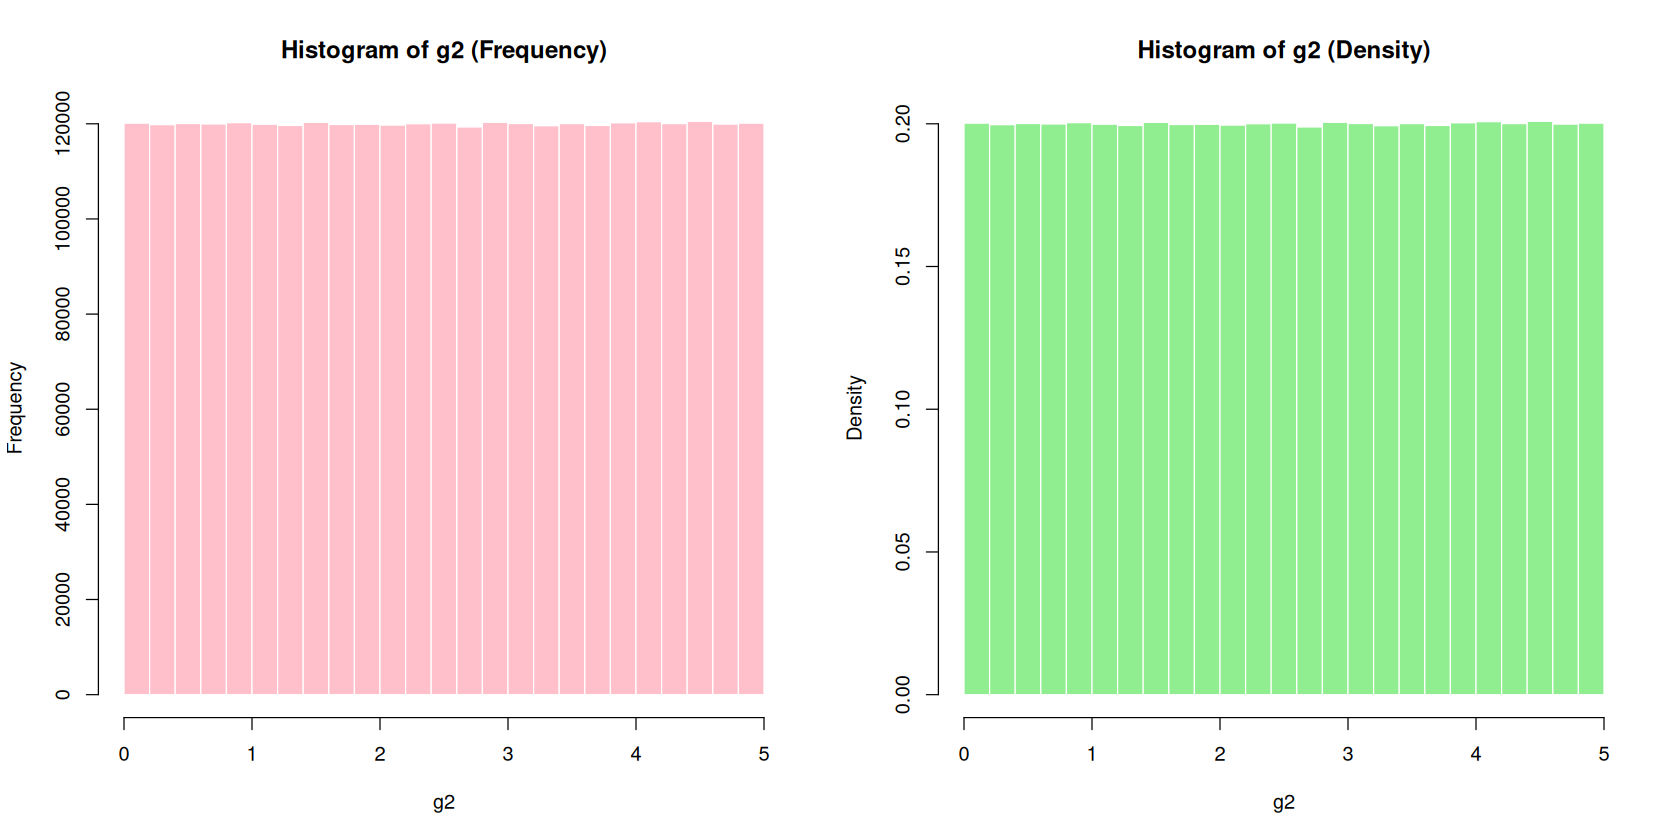

In [125]:
par(mfrow = c(1, 2))

# Set plot size in Jupyter Notebook (14 x 7 inches)
options(repr.plot.width = 14, repr.plot.height = 7)

# Plot a histogram showing frequencies of the generated values
hist(g2, main = "Histogram of g2 (Frequency)", col = "pink", border = "white")

# Plot a histogram showing the density of the generated values
hist(g2, probability = TRUE, main = "Histogram of g2 (Density)", col = "lightgreen", border = "white")

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Task</span><br/>
  Use the help function to understand the difference between frequency and density in histograms.<br/>
  </div>

## 0.3 Create a factor with repeated levels -> *gl(`n`, `k`, `length`, `labels`)*

**gl** : *Creates a factor with repeated levels*
- **n** → *Number of levels (distinct groups)*  
- **k** → *Number of repetitions per level*  
- **length** → *Total number of values*  
- **labels** → *Names of the levels (e.g., "A", "B")* 

In [126]:
# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
g3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
g4 <- gl(2, 5, 30, labels = c("D", "E"))

print(g3)
print(g4)

 [1] A A A A A A A A A A B B B B B B B B B B C C C C C C C C C C
Levels: A B C
 [1] D D D D D E E E E E D D D D D E E E E E D D D D D E E E E E
Levels: D E


## 0.4 Create a data frame -> *data.frame(...)*

**data.frame** : *Creates a data frame from vectors (`vector1`.. `vectorn`)*

**df<-data.frame(`colname1` = `vector1`,
            `col2` = `vector2`,
            .....,
            `coln` = `vectorn`
            )**

In [127]:
# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(g1, g2, g3, g4)
head(dat)

,g1,g2,g3,g4
,<dbl>,<dbl>,<fct>,<fct>
1,-0.50316543,4.209569,A,D
2,-0.87134771,1.802975,A,D
3,1.85557345,2.508912,A,D
4,1.45996158,3.789929,A,D
5,0.01258818,4.754895,A,D
6,0.82845327,4.400252,A,E


# Question 1

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>
  What  is the correct output when compiling the follwong line of code ?<br/>
  <pre style="font-size: 20px; margin: 5px 0;"><code>g <- rnorm(30, mean = 15, sd = 100)</code></pre>
    <form>
    <label><input type="radio" name="q6" value="log_altitude"> Standard deviation = 100, mean = 30</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> Standard deviation = 30, mean = 100</label><br/>
    <label><input type="radio" name="q6" value="normalize_both"> Standard deviation = 100, mean = 15</label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> Standard deviation = 30, mean = 15</label>
  </form>
        <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    You can check your answer by clicking on the "Answer" below.
  </p>
</div>




  
<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <form>
    <label><input type="radio" name="q6" value="log_altitude"> Standard deviation = 100, mean = 30</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> Standard deviation = 30, mean = 100</label><br/>
    <label><input type="radio" name="q6" value="normalize_both"><span style="color:blue;"> Standard deviation = 100, mean = 15</span></label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> Standard deviation = 30, mean = 15</label>
  </form>
  </div>
</details>


# Question 2

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>
  What is the mean and the standard deviation of the following distribution ?<br/>
  
  <!-- Replace code block by image -->
  <div style="text-align: center; margin: 10px 0;">
    <img src="images/uniform distribution.png" alt="Gaussian distribution code" style="max-width: 80%; height: auto;">
  </div>
    
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    You can check your answer by clicking on the "Answer" below.
  </p>
</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>Standard deviation = 5</code>.<br/>
    <code>Mean = 15</code>.
  </div>
</details>


# Question 3

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 3</span><br/>
  What should be the value of "?" in this probability density function of a uniform distribution?<br/><br/>
  
  <!-- Replace code block by image -->
  <div style="text-align: center; margin: 10px 0;">
    <img src="images/Script2_question3.png" alt="Gaussian distribution code" style="max-width: 60%; height: auto;">
  </div>
    <form>
    <label><input type="radio" name="q6" value="log_altitude"> 1/(b-a) = 1/4 </label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> 1/(b-a) = 1/6</label><br/>
    <label><input type="radio" name="q6" value="normalize_both"> 1/(b-a) = 1/2</label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> 1/(b-a) = 1/8</label>
  </form>
        <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    You can check your answer by clicking on the "Answer" below.
  </p>
</div>
</div>






  
<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <form>
    <label><input type="radio" name="q6" value="normalize_both"><span style="color:blue;">1/(b-a) = 1/4</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> 1/(b-a) = 1/6</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> 1/(b-a) = 1/2</span></label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> 1/(b-a) = 1/8</label>
  </form>
  </div>
</details>


# Question 4

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 4</span><br/>
  Create a factor vector of length 20 with two levels: <code>"Fish 1"</code> and <code>"Fish 2"</code>.<br/>
  The values should repeat the sequence: <code>4 4 4 4 4</code> for each fish.<br/>
  For example, the vector should look like:<br/>
  <code>"Fish 1" "Fish 1" "Fish 1" "Fish 1" "Fish 2" "Fish 2" "Fish 2" "Fish 2" "Fish1" ...</code><br/>
  (total length = 20)
</div>


In [128]:
# Generate a factor variable with 2 levels (n=),
# each level repeated 4 times consecutively(k=),
# total length of the factor is 20(length=),
# and the levels are labeled as "Fish 1", "Fish 2"
g <- gl(n = ___, k = ___, length = ___, labels = c("____","____"))
g


ERROR: Error in parse(text = input): <text>:5:14: unexpected input
4: # and the levels are labeled as "Fish 1", "Fish 2"
5: g <- gl(n = __
                ^



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> g <- gl(<span style="color:blue;">n = 2 </span>, <span style="color:blue;">k=4</span>, <span style="color:blue;">length=20</span>, <span style="color:blue;">labels = c("Fish 1 ","Fish 2")</span> ) </code><br/>
  </div>
</details>


# Question 5

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 5</span><br/>
  Complete the code below to generate : <br/>
  1) A Gaussian (normal) distribution vector of <strong>length 20</strong> with a <strong>mean of 10</strong> and a <strong>standard deviation of 2</strong>.<br/>
  2) A uniform distribution vector of <strong>length 20</strong> with values <strong>between 10 and 100</strong>.<br/>
  3) A factor vector of <strong>length 20</strong> with <strong>4 levels</strong> labeled <code>&quot;Plant 1&quot;</code>, <code>&quot;Plant 2&quot;</code>, <code>&quot;Plant 3&quot;</code>, and <code>&quot;Plant 4&quot;</code>, each level <strong>repeated 5 times</strong>.<br/>
  4) A Gaussian (normal) distribution vector of <strong>length 20</strong> with a <strong>mean of 1</strong> and a <strong>standard deviation of 0.5</strong>.<br/>
  5) Generate a dataframe using these previous vectors.<br/>
  
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Complete the code to generate these vectors.
  </p>
</div>


In [ ]:
# 1) Generate a Gaussian (normal) distribution vector
# - length: 20
# - mean: 10
# - standard deviation: 2
vec1 <- rnorm(____, mean = ____, sd = ____)

# 2) Generate a uniform distribution vector
# - length: 20
# - values between: 10 and 100
vec2 <- runif(____, min = ____, max = ____)

# 3) Generate a factor vector
# - length: 20
# - levels: "Plant 1", "Plant 2", "Plant 3", "Plant 4"
# - each level repeated: 5 times
vec3 <- gl(____, ____, length = ____, labels = c("Plant 1", "Plant 2", "Plant 3", "Plant 4"))

# 4) Generate another Gaussian (normal) distribution vector
# - length: 20
# - mean: 1
# - standard deviation: 0.5
vec4 <- rnorm(____, mean = ____, sd = ____)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>vec1 &lt;- rnorm(<span style="color:blue;">20</span>, mean = <span style="color:blue;">10</span>, sd = <span style="color:blue;">2</span>)</code><br/>
  </div>
      <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec2 &lt;- runif(<span style="color:blue;">20</span>, min = <span style="color:blue;">10</span>, max = <span style="color:blue;">100</span>)</code><br/>
  </div>
  <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec3 &lt;- gl(<span style="color:blue;">4</span>, <span style="color:blue;">5</span>, length = <span style="color:blue;">20</span>, labels = c(<span style="color:blue;">"Plant 1"</span>, <span style="color:blue;">"Plant 2"</span>, <span style="color:blue;">"Plant 3"</span>, <span style="color:blue;">"Plant 4"</span>))</code><br/>
  </div>

  <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec4 &lt;- rnorm(<span style="color:blue;">20</span>, mean = <span style="color:blue;">1</span>, sd = <span style="color:blue;">0.5</span>)</code><br/>
  </div>

</details>




In [ ]:
# 5) Combine the vectors into a dataframe
df <- data.frame(Gaussian1 = ___,
                 Uniform = ___,
                 Plant = ___,
                 Gaussian2 = ___)

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>df &lt;- data.frame(Gaussian1 = <span style="color:blue;">vec1</span>,<br/>
                 Uniform = <span style="color:blue;">vec2</span>,<br/>
                 Plant = <span style="color:blue;">vec3</span>,<br/>
                 Gaussian2 = <span style="color:blue;">vec4</span>)</code><br/>
    <img src="images/df_generated.png" alt="Dataframe generated" style="margin-top: 10px; max-width: 100%; border: 1px solid #ccc;"/>
  </div>
</details>


# 1 Data Transformation -> *log(), sqrt(), df^a, decostand(), scale()*

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <img src="images/DataTransformation_illustration_tranformation_only.png" alt="Data Transformation" style="max-width: 40%; height: auto;" />
</div>


## 1.1  Log-transformation  (right skewed data) -> *log(df),log(df$col)*

- **log(`df`)** : *log transforms every columns of a dataframe*

- **log(`df$col`)** : *log transforms specific column of a dataframe*

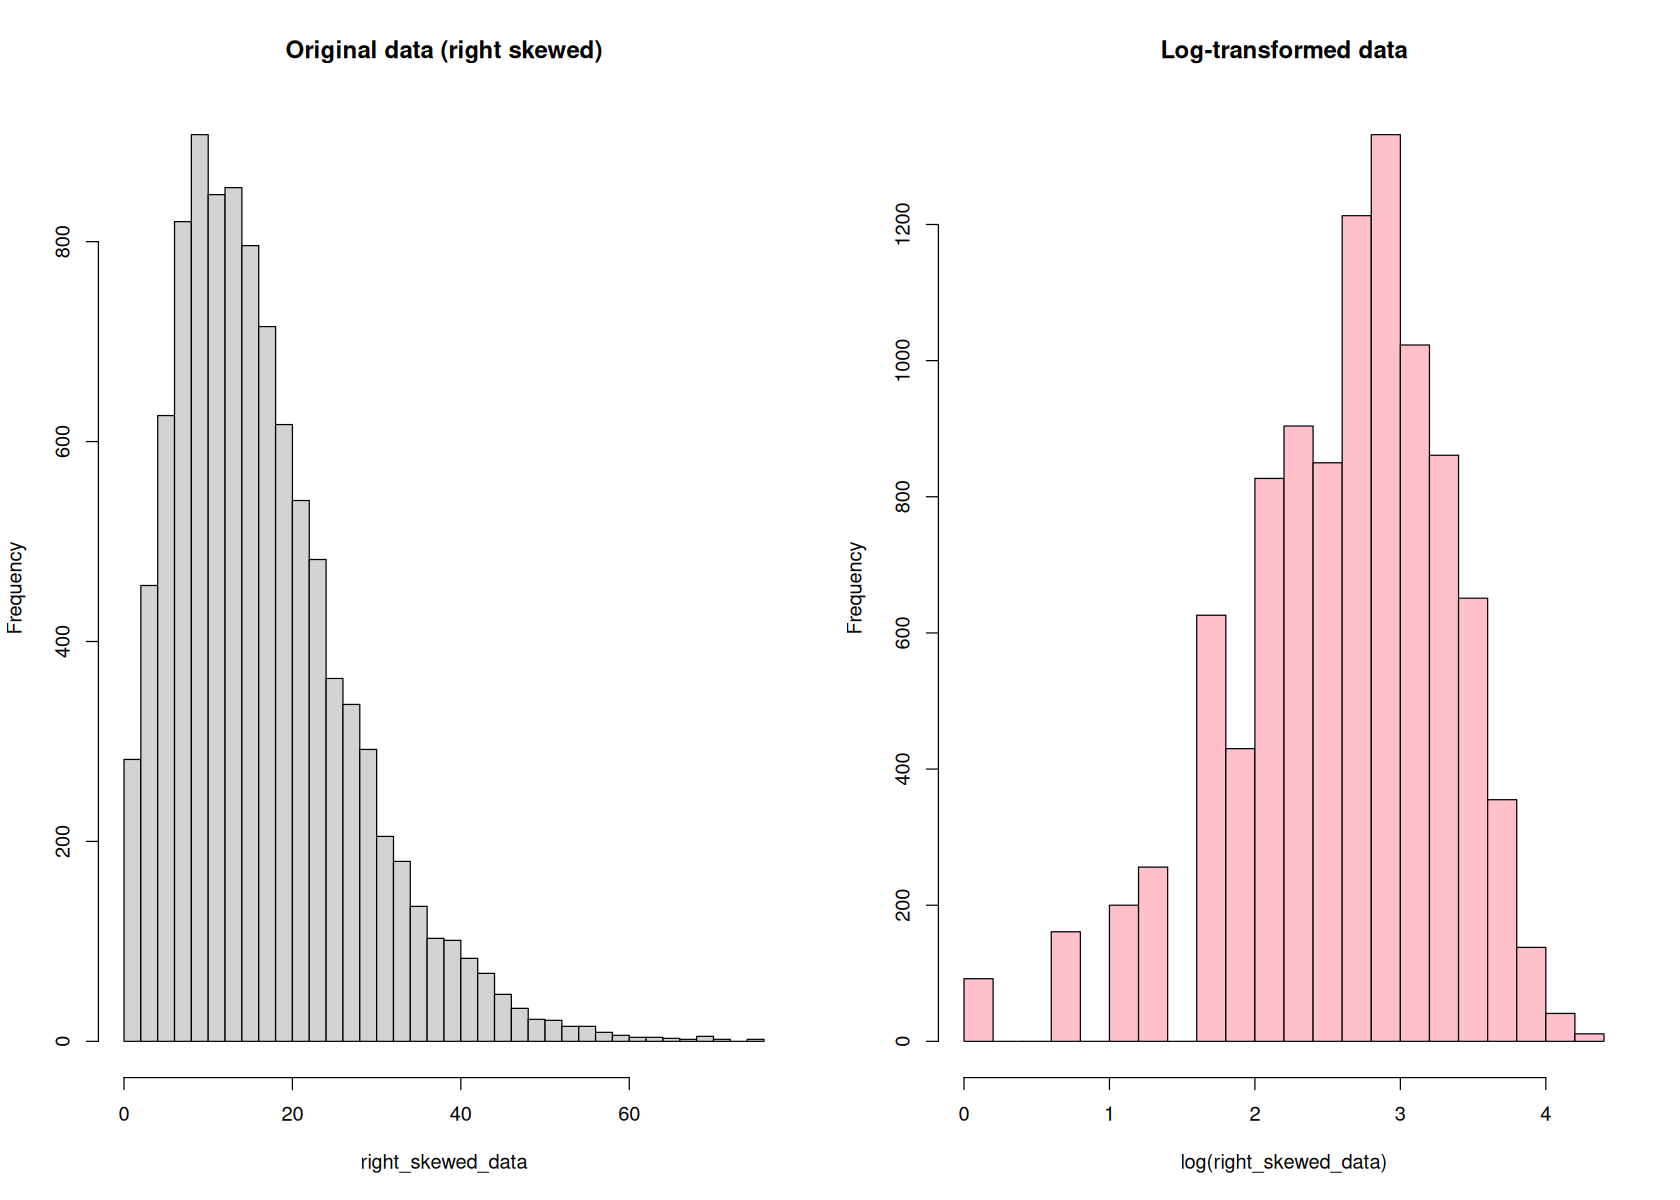

In [1]:
# Create example data frame with right-skewed data
right_skewed_data<-rnbinom(10000, 3, 0.15) #check out ?rbeta and ?rnbinom for non-normal distributions!

par(mfrow = c(1, 2))

# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)

# Histogram before transformation 
hist(right_skewed_data, breaks = 30, main = "Original data (right skewed)", col = "lightgray")

# Histogram after log transformation 
hist(log(right_skewed_data), breaks = 30, main = "Log-transformed data", col = "pink")

## 1.2  Square-root-transformation (slightly right skewed data) -> *sqrt(df),sqrt(df$col)*

- **sqrt(`df`)** : *Squared transforms every columns of a dataframe*

- **sqrt(`df$col`)** : *Squared transforms specific column of a dataframe*

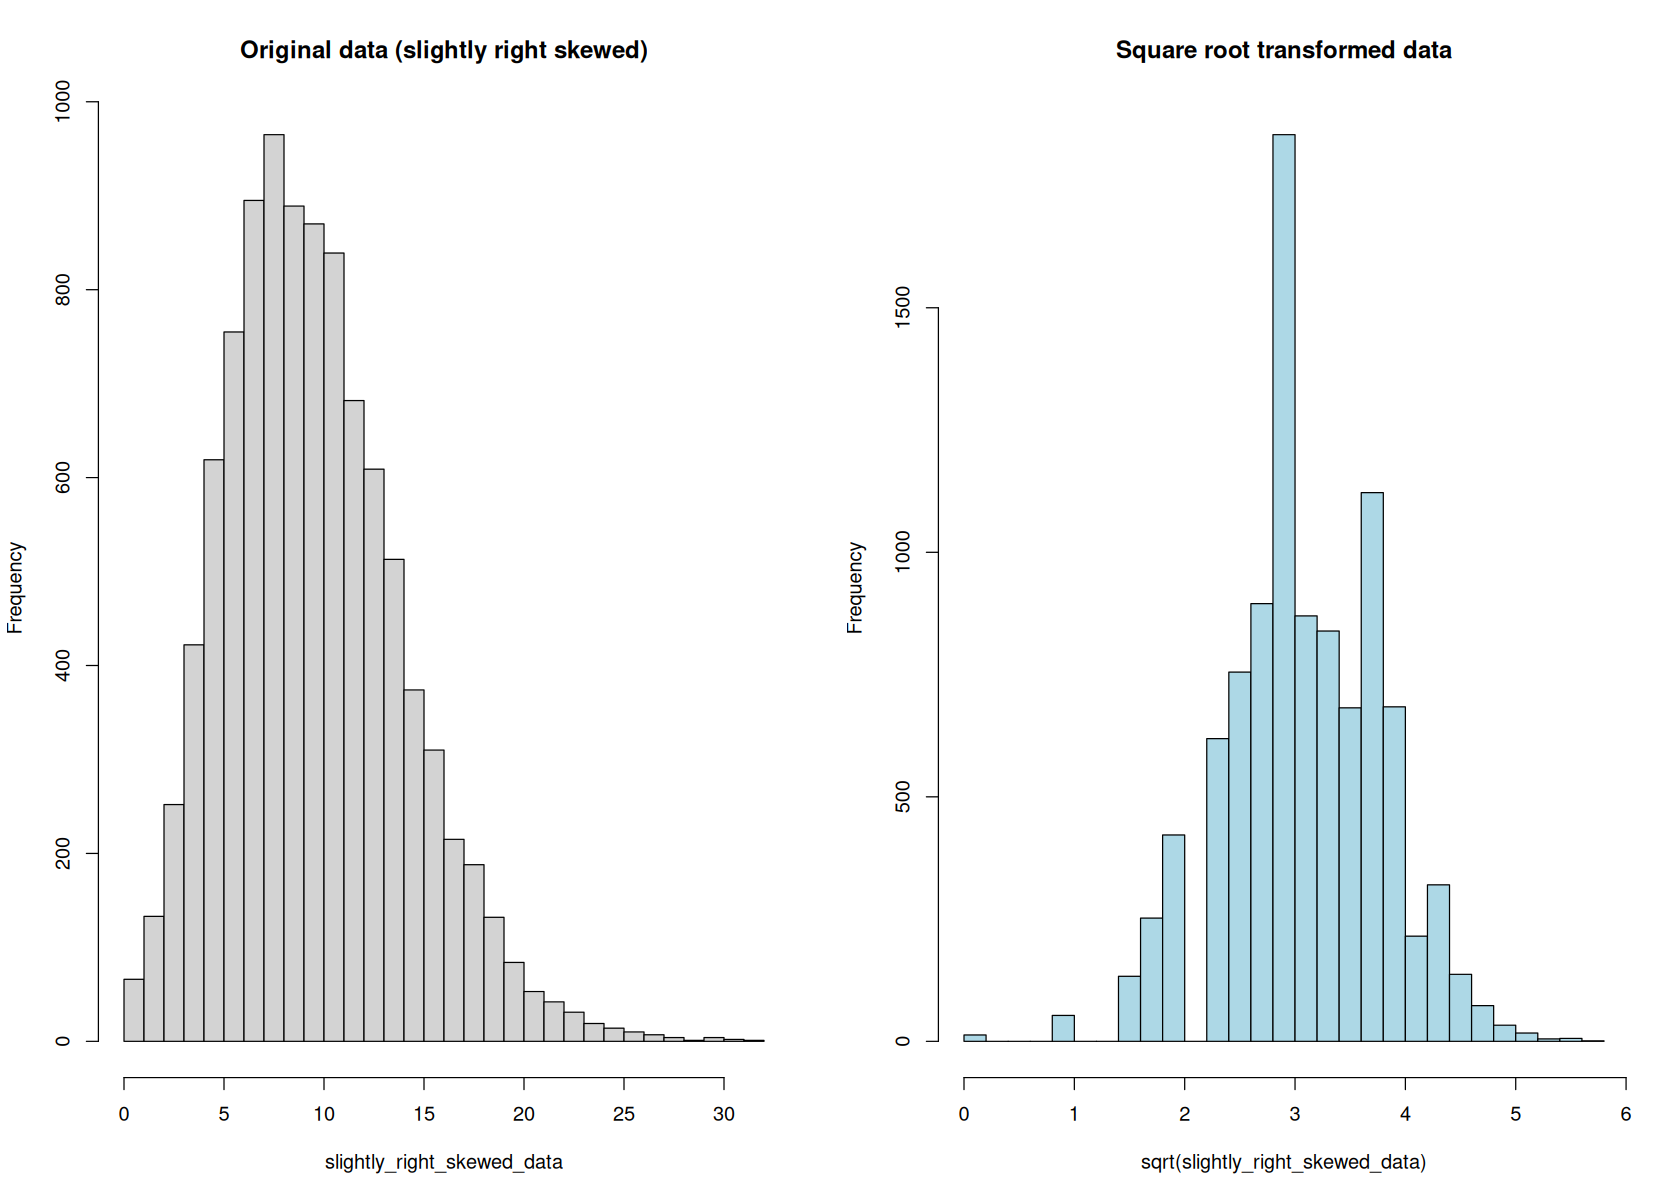

In [2]:
# Create example data frame with slightly right-skewed data
slightly_right_skewed_data <- rnbinom(10000, 10, 0.5)

# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(1, 2))
# Histogram before transformation 
hist(slightly_right_skewed_data, breaks = 30, main = "Original data (slightly right skewed)", col = "lightgray")

# Histogram before transformation
hist(sqrt(slightly_right_skewed_data), breaks = 30, main = "Square root transformed data", col = "lightblue")

## 1.3  Power-transformation (left-skewed data) -> *(df)^a,(df$col)^a*

- **(`df`)^a** : *Power transforms every columns of a dataframe*

- **(`df$col`)^a** : *Power transforms specific column of a dataframe*

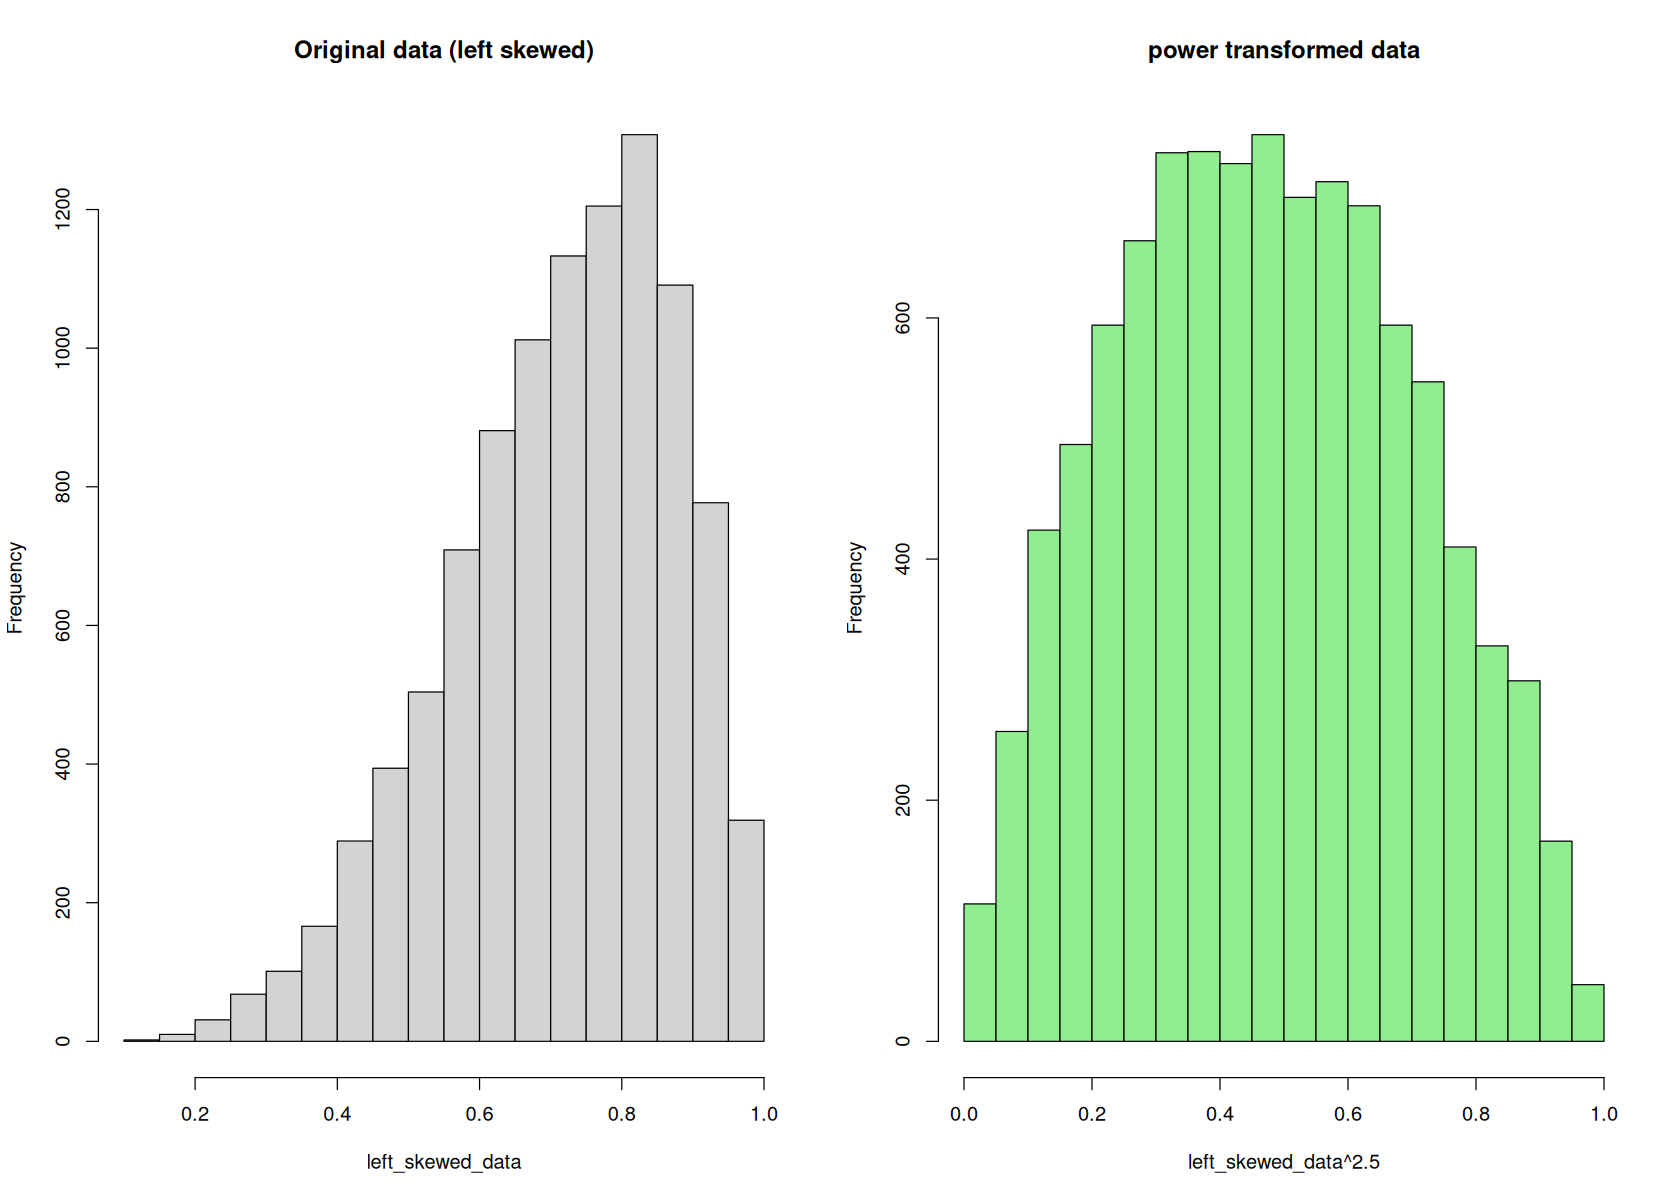

In [3]:
# Create example data frame with left-skewed data
left_skewed_data <- rbeta(10000,5,2)

par(mfrow = c(1, 2))

# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)
# Histogram before transformation 
hist(left_skewed_data, breaks = 30, main = "Original data (left skewed)", col = "lightgray")

# Histogram before transformation
hist(left_skewed_data^2.5, breaks = 30, main = "power transformed data", col = "lightgreen")

## 1.4 Standardization (z-score) -> *decostand(), scale()*

### 1.4.1 Using decostand  -> *decostand(`df`,`"standardize"`)* 

- **decostand(`df`,method = `"standardize"`)** : *Standardize the variables (z-scores: mean = 0, sd = 1) of a dataframe* and **returns a Dataframe**


In [6]:
# Create a fake dataset with 3 numeric variables
df <- data.frame(
  Temp = c(15, 18, 20, 22, 19),
  pH = c(6.5, 7.0, 6.8, 7.2, 6.9),
  Conductivity = c(120, 150, 160, 180, 140)
)

# Standardize the variables (z-scores: mean = 0, sd = 1)
df_std1 <- decostand(df, method = "standardize")


# Check that the means are ~0 and standard deviations are ~1
# apply() applies a function (here "mean") to a dataframe (here df_std1). MARGIN (here 2) defines if the function is applied over rows or over columns. check ?apply
print("check if mean after standardization is close to 0 for all three parameter")
apply(df_std1, 2, mean)
print("check if sd after standardization is close to 1")
apply(df_std1, 2, sd) 

[1] "check if mean after standardization is close to 0 for all three parameter"


Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

[1] "check if sd after standardization is close to 1"


Temp           pH Conductivity 
           1            1            1

### 1.4.2 Using scale -> *scale(`df`)*  (alternative to decostand with method standardize)
- **scale(`df`)** : *Standardize the variables (z-scores: mean = 0, sd = 1) of a dataframe* and **returns a Matrix**

In [7]:
# Standardize using base R's scale() function
df_std2 <- as.data.frame(scale(df))

# Check that the means are ~0 and standard deviations are ~1
apply(df_std2, 2, mean)# check if means = 0
apply(df_std2, 2, sd)# check if sd = 1
summary(df_std1==df_std2)  #check if df_std1 and df_std2 are identical. == tests if values are identical and returns TRUE or FALSE, function summary() counts how many times (df_std1==df_std2) is "TRUE" (or FALSE). 

Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

Temp           pH Conductivity 
           1            1            1

   Temp            pH          Conductivity  
 Mode:logical   Mode:logical   Mode:logical  
 TRUE:5         TRUE:5         TRUE:5        

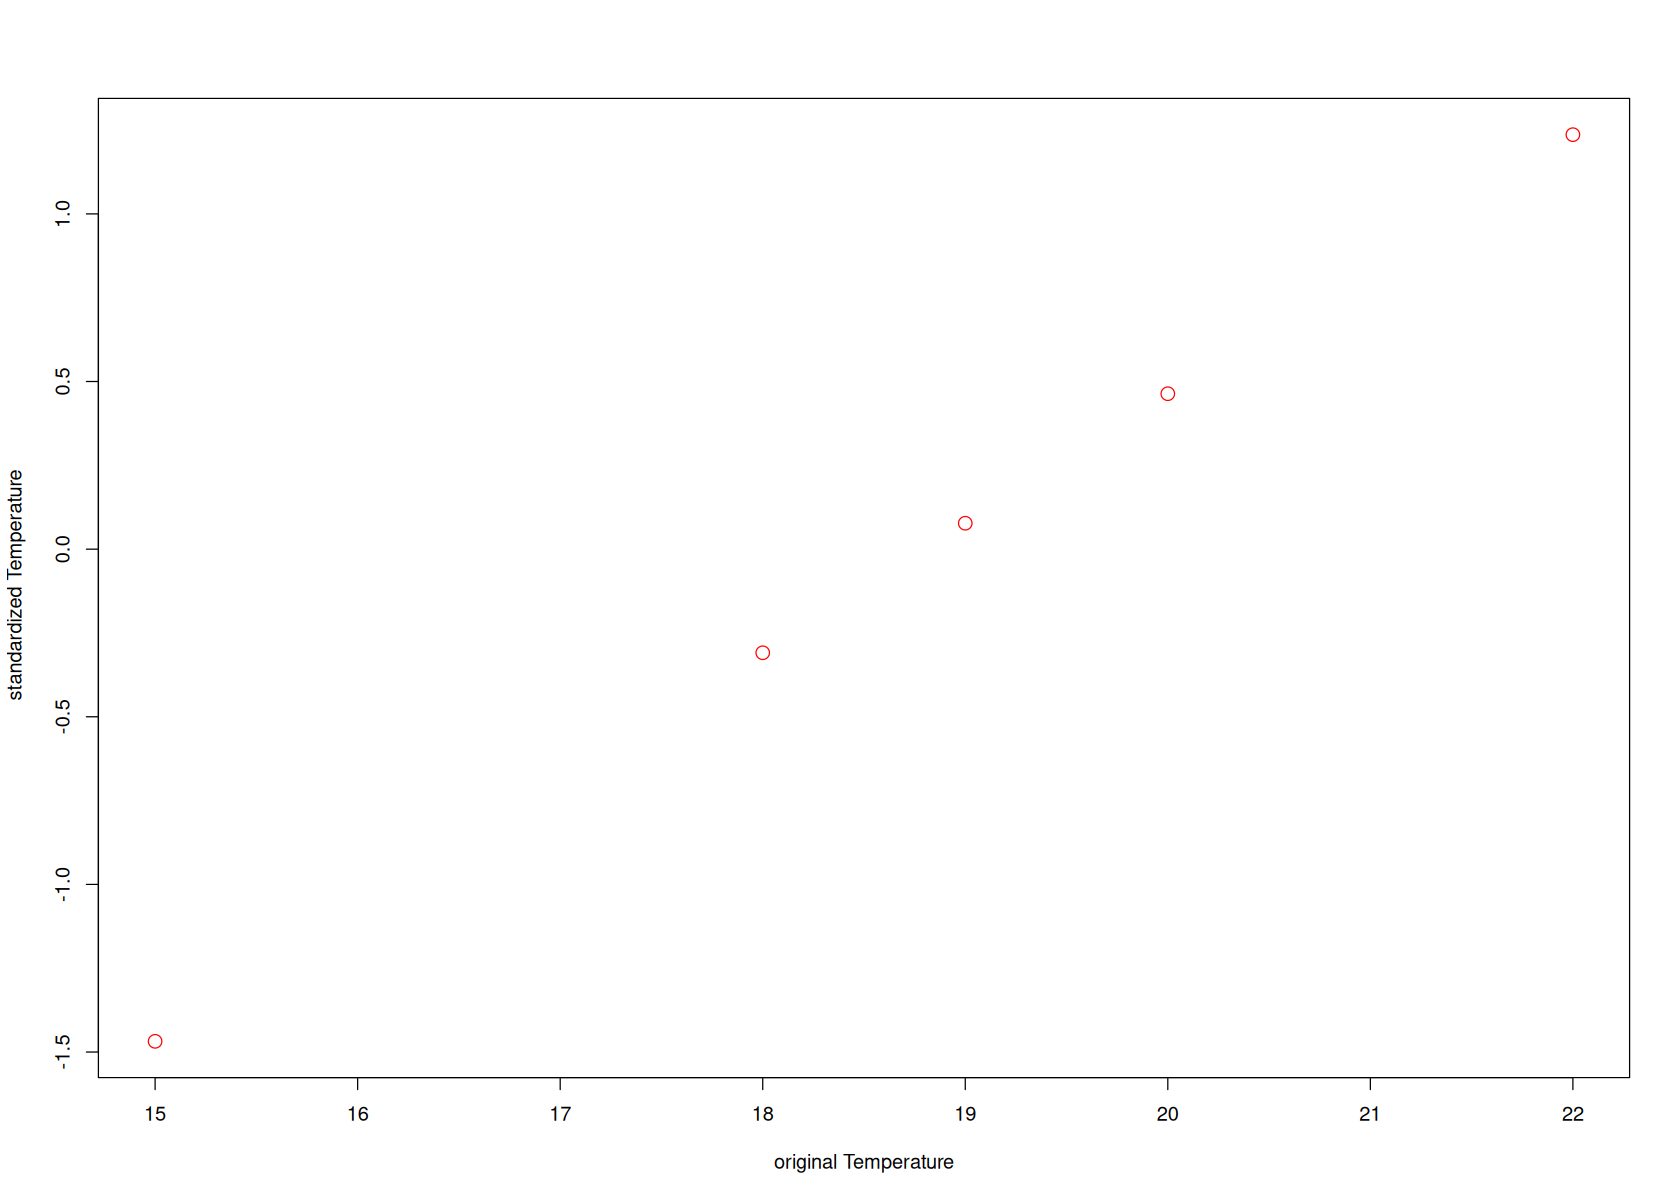

In [8]:
# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)

# Original temperature distribution
plot(df$Temp,df_std1$Temp, xlab = "original Temperature", ylab = " standardized Temperature", col = "red", cex=1.5)

# Question 6

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 6</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
      The bar plot on the right shows the population of various towns in the state of Washington.<br/>  
      We can observe that some towns have significantly higher population numbers than others.<br/><br/>
      <strong>What transformation should be applied to make this distribution closer to a normal distribution?</strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/skew_left_dist.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

  <form>
    <label><input type="radio" name="q5" value="log"> Logarithmic transformation (log)</label><br/>
    <label><input type="radio" name="q5" value="sqrt"> Square root (√)</label><br/>
    <label><input type="radio" name="q5" value="square"> Power transformation</label><br/>
    <label><input type="radio" name="q5" value="reciprocal"> Reciprocal transformation (1/x)</label>
  </form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <form>
      <label><input type="radio" name="q5" value="log">Logarithmic transformation (log)</label><br/>
      <label><input type="radio" name="q5" value="sqrt"> Square root (√)</label><br/>
      <label style="color: blue;"><input type="radio" name="q5" value="squaring"> Power Transformation </label><br/>
      <label><input type="radio" name="q5" value="reciprocal"> Reciprocal transformation (1/x)</label>
    </form>
  </div>
</details>


# Question 7

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 7</span><br/>

  <div style="margin-bottom: 15px;">
    We have several variables in a dataframe: <br/>
    - pH [0–14]<br/>
    - Temperature [–45 to 100 °C]<br/>
    - Altitude [500 to 2600 m]<br/>
    - Dissolved oxygen concentration (DO) [0.007–0.0015 g/L]<br/><br/>
    We want to assess the relative variation in altitude and temperature.<br/>
    <strong>Which transformation should we apply to compare these parameters?</strong>
  </div>

  <form>
    <label><input type="radio" name="q6" value="log_altitude"> Log-transform altitude only</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> Square root transform altitude only</label><br/>
    <label><input type="radio" name="q6" value="standardize_both"> Standardize both altitude and temperature</label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> Power transform temperature only</label>
  </form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
  <form>
    <label><input type="radio" name="q6" value="log_altitude"> Log-transform altitude only</label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> Square root transform altitude only</label><br/>
    <label style="color: blue;"><input type="radio" name="q6" value="Standardize_both"> Standardize both altitude and temperature</label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> Power transform temperature only</label>
  </form>
  </div>
</details>


# Homework : Task 1

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 1</span><br/>
  Inspect the numerical environmental parameters of the mites dataset (<code>env</code>).<br/>
  <ol>
    <li>Which parameters are numerical?</li>
    <li>Which parameters require transformation to improve normality?</li>
    <li>Which transformation improves normality for the <code>nit</code> variable?</li>
  </ol>
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer these questions based on your analysis.
  </p>
</div>


<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>


In [ ]:
load("Doubs.RData")  

In [ ]:
## Q1 which parameter are numerical? : (hint : sapply(df, class) )
# your code here :

sapply(___,class) # Complete the blank to anylse the env dataset


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
    1. After completing the cell above, which Parameters are <strong>numerical</strong> ?
  <form>
    <label><input type="radio" name="q6" value="log_altitude"> dfs </label><br/>
    <label><input type="radio" name="q6" value="sqrt_altitude"> ele </label><br/>
    <label><input type="radio" name="q6" value="normalize_both"> slo</label><br/>
    <label><input type="radio" name="q6" value="power_temperature"> dis</label><br/>
    <label><input type="radio" name="q6" value="ph"> pH</label><br/>
    <label><input type="radio" name="q6" value="har"> har</label><br/>
    <label><input type="radio" name="q6" value="pho"> pho</label><br/>
    <label><input type="radio" name="q6" value="nit"> nit</label><br/>
    <label><input type="radio" name="q6" value="amm"> amm</label><br/>
    <label><input type="radio" name="q6" value="oxy"> oxy</label><br/>
    <label><input type="radio" name="q6" value="bod"> bod</label>
  </form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>sapply(<span style="color:blue;">env</span>,class) </code><br/>
  </div>


<div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">
<form>
  <label><input type="radio" name="q6" value="log_altitude"> <span style="color:blue;">dfs</span> </label><br/>
  <label><input type="radio" name="q6" value="sqrt_altitude"> ele </label><br/>
  <label><input type="radio" name="q6" value="normalize_both"> <span style="color:blue;">slo</span></label><br/>
  <label><input type="radio" name="q6" value="power_temperature"> <span style="color:blue;">dis</span></label><br/>
  <label><input type="radio" name="q6" value="ph"> <span style="color:blue;">pH</span></label><br/>
  <label><input type="radio" name="q6" value="har"> har</label><br/>
  <label><input type="radio" name="q6" value="pho"> <span style="color:blue;">pho</span></label><br/>
  <label><input type="radio" name="q6" value="nit"> <span style="color:blue;">nit</span></label><br/>
  <label><input type="radio" name="q6" value="amm"> <span style="color:blue;">amm</span></label><br/>
  <label><input type="radio" name="q6" value="oxy"> <span style="color:blue;">oxy</span></label><br/>
  <label><input type="radio" name="q6" value="bod"> <span style="color:blue;">bod</span></label>
</form>
</div>



</details>




In [ ]:
##Q2: which parameter requires transformation to improve normality? (Hint: Use hist())
# your code here :

# Number of columns to plot
n <- ncol(env)
# Calculate number of columns in the plot grid
ncol_plot <- ceiling(sqrt(n))  
# Calculate number of rows in the plot grid
nrow_plot <- ceiling(n/ncol_plot) 



# Set plotting layout
par(mfrow = c(nrow_plot, ncol_plot))  


# Plot histograms for each column
for (col_name in colnames(env)) {
  ___(env[[col_name]], main = paste("Histogram of", col_name), xlab = col_name) # Fill in the blank with the appropriate function to visualize each variable's distribution 
}

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code><span style="color:blue;">hist</span>(env[[col_name]], main = paste("Histogram of", col_name), xlab = col_name)</code><br/>
    <img src="images/hist_env.png" alt="Histogram of env variables" style="margin-top:10px; max-width:100%; height:auto;">
  </div>
</details>


In [ ]:
##Q3: Which transformation improves normality for the nit variable? (Hint: Use log(),sqrt(),^2,asin())
# your code here :

# Set up the plotting window with 2 rows and 3 columns
par(mfrow = c(2, 3))

# Histogram of the original variable
hist(env$nit, main = "Original nit", xlab = "nit") # Fill in the blank with the appropriate function 

# Log-transformed histogram (adding 1 to avoid log(0))
hist(___(env$nit + 1), main = "Log transformation", xlab = "log(nit + 1)") # Fill in the blank with the appropriate function 

# Square root transformed histogram
hist(___(env$nit), main = "Square root transformation", xlab = "sqrt(nit)") # Fill in the blank with the appropriate function 

# Squared variable histogram
hist((env$nit)^___, main = "Square transformation", xlab = "nit^2")  # Fill in the blank with the appropriate function 

# Arcsine square root transformed histogram
hist(___(env$nit), main = "Arcsin transformation", xlab = "asin(nit)") # Fill in the blank with the appropriate function 


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <img src="images/answer.png" alt="Transformation 1" style="max-width: 50%; height: auto; margin-bottom: 10px;" /><br/>
    <img src="images/hist_transf_nit.png" alt="Transformation 2" style="max-width: 100%; height: auto;" />
  </div>
</details>


# Data processing : removing empty site (Nr. 8 contains no fish) for the rest of the code 

In [ ]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]

# 2 Distance/Dissimilarity matrices

<div style="padding: 20px; border:4px solid green; font-size: 20px;">
  <img src="images/DataTransformation_dissimilarities_only.png" alt="Data Transformation" style="max-width: 40%; height: auto;" />
</div>


# 2.1 Distance & Dissimilarity Metrics for **(semi-)quantitative data** 
# Bray-Curtis, Euclidean distance, Chord distance, Hellinger distance ->(*vegdist(),dist()*)

<div style="border: 3px solid green; padding: 10px; max-width: 1000px; margin: auto;">

  <!-- Image du haut -->
  <div style="text-align: center; margin-bottom: 20px;">
    <img src="images/Q_modes.png" alt="Q Modes" style="width: 80%; max-width: 30%; height: auto;">
  </div>

  <!-- Ligne contenant deux images -->
  <div style="display: flex; justify-content: center; gap: 20px;">
    <div style="flex: 1; text-align: center;">
      <img src="images/Q_mode_semi.png" alt="Q Mode Semi" style="width: 100%; max-width: 60%; height: auto;">
    </div>
    <div style="flex: 1; text-align: center;">
      <img src="images/distances.png" alt="Euclidean Distance" style="width: 100%; max-width: 60%; height: auto;">
    </div>
  </div>

</div>


## 2.1.1 Bray-Curtis dissimilarity matrix -> *vegdist(df)* 

- **vegdist(`df`)** : *Computes the Bray-Curtis dissimilarity between rows of a dataframe `df` or matrix*

<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Bray Curtis Dissimilarity
    </div>
    <img src="images/Bray_curtis.png" width="45%">
</div>


## Display Bray-curtis dissimilarity matrix

In [ ]:
# Compute Bray-Curtis dissimilarity matrix from the 'spe' dataset
spe.db <- vegdist(spe)

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Display the dissimilarity matrix as a color image
image.real(as.matrix(spe.db))
title("Bray-Curtis Dissimilarity Matrix Across Samples")

## Display Bray-Curtis dissimilarity matrix using coldiss

In [ ]:
# Set plot size in Jupyter (wide and not too tall)
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the dissimilarity matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well
coldiss(spe.db, nc = 15, diag = TRUE)

# Add a title above the plot
title("Bray-Curtis Dissimilarity Matrix Across Samples", line = 3)


## Display Bray-Curtis dissimilarity matrix of log-transformed species data

In [ ]:
# Compute Bray-Curtis dissimilarity matrix on log-transformed abundances (log(x+1))
spe.dbln <- vegdist(log1p(spe))   #QUESTION: what does log1p stand for? Use help(log1p)!

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Display the dissimilarity matrix as a color image
image.real(as.matrix(spe.dbln))

# Add a title above the plot
title("Bray-Curtis Dissimilarity Matrix Across Samples (log-transformed)")


## Display Bray-Curtis dissimilarity matrix using coldiss

In [ ]:
# Set plot size in Jupyter (wide and not too tall)
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the dissimilarity matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well
coldiss(spe.dbln, nc = 15, diag = TRUE)

# Add a title above the plot
title("Bray-Curtis Dissimilarity Matrix Across Samples (log-transformed)", line = 3)


### 2.2.1 Euclidian distance -> *dist(df)*

- **dist(`df`)** : *Computes the Euclidean distance between rows of a dataframe`df`or matrix*;

<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Euclidian Distance
    </div>
    <img src="images/euclidian distance_15_09.png" width="35%">
</div>


## Display Euclidian Distance matrix

In [ ]:
# Compute Euclidean distance matrix from the species dataset - attention: double zero issue!
spe.eucl <- dist(spe)

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Euclidean distance matrix as a color image
image.real(as.matrix(spe.eucl))

# Add a title above the plot
title("Euclidean Distance Matrix Across Samples")

## Display ordered Euclidean distance matriX

In [ ]:
# Set plot size in Jupyter (wide and not too tall)
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the Euclidean distance matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well
coldiss(spe.eucl, nc = 15, diag = TRUE)

# Add a title above the plot
title("Euclidean Distance Matrix Across Samples", line = 3)


### 2.2.2 Chord distance -> *dist(df_norm)*

- **dist(`df_norm`)** : *Computes the Euclidean distance between rows after normalizing each row to unit length (normalization)*;

<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Chord Distance
    </div>
    <img src="images/chord distance.png" width="45%">
</div>


## Display Chord Distance matrix

In [ ]:
# Normalize species data using decostand with "nor" method
spe.norm <- decostand(spe, "nor")

# Compute Euclidean distance matrix (Chord distance is Euclidean on normalized data)
spe.dc <- dist(spe.norm)

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Chord distance matrix as a color image
image.real(as.matrix(spe.dc))

# Add a title above the plot
title("Chord Distance Matrix Across Samples")


### 2.2.3 Hellinger distance matrix -> *dist(df_hel)*

- **dist(`df_hel`)** : *Computes the Euclidean distance between rows after Hellinger transformation* (square root of relative abundances);


<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Hellinger Distance
    </div>
    <img src="images/Hellinger Distance.png" width="45%">
</div>


## Display Hellinger Distance matrix

In [ ]:
# Transform species data using Hellinger transformation
spe.hel <- decostand(spe, "hel")

# Compute Euclidean distance matrix on Hellinger-transformed data
spe.dh <- dist(spe.hel)

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Hellinger distance matrix as a color image
image.real(as.matrix(spe.dh))

# Add a title above the plot
title("Hellinger Distance Matrix Across Samples")

## Display every dissimilarity/distance matrix 

In [ ]:
# Set up a 2 rows x 3 columns plotting layout with tighter margins
par(mfrow = c(2, 3), mar = c(4, 4, 3, 1))

# Set plot size in Jupyter Notebook (width = 18 inches, height = 12 inches)
options(repr.plot.width = 18, repr.plot.height = 12)

# --- Top row: Bray-Curtis dissimilarity matrices ---

# Bray-Curtis dissimilarity matrix (raw data)
image.real(as.matrix(spe.db))
title("Bray-Curtis Dissimilarity")

# Bray-Curtis dissimilarity matrix (log-transformed data)
image.real(as.matrix(spe.dbln))
title("Bray-Curtis Dissimilarity (Log-Transformed)")

# Empty plot to fill third slot on top row
plot.new()

# --- Bottom row: Other distance/dissimilarity matrices ---

# Euclidean distance matrix
image.real(as.matrix(spe.eucl))
title("Euclidean Distance")

# Chord distance matrix (Euclidean distance on normalized data)
image.real(as.matrix(spe.dc))
title("Chord Distance ")

# Hellinger distance matrix
image.real(as.matrix(spe.dh))
title("Hellinger Distance")


# Question 8

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 8</span><br/>

  <div style="margin-bottom: 15px;">
    We want to compare samples based on several parameters (pH, altitude, pressure, oxygen concentration). Data analysts disagree:<br/><br/>
    - One group argues that it is essential to use an <strong>asymmetric</strong> index due to the problem of <em>double zeros</em> (common absences).<br/>
    - Another group argues that a <strong>symmetric</strong> index is sufficient, that there is no need to worry about double zeros.<br/><br/>
    <strong>Which group is correct?</strong>
  </div>

  <form>
    <label><input type="radio" name="q" value="symmetric"> 1) The group advocating the use of a <strong>symmetric</strong> index</label><br/>
    <label><input type="radio" name="q" value="asymmetric"> 2) The group advocating the use of an <strong>asymmetric</strong> index</label>
  </form>

   <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer  is displayed below
  </p>
</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
   <form>
    <label style="color: blue;"><input type="radio" name="q6" value="normalize_both">  1) The group advocating the use of a <strong>symmetric</strong> index</label><br/>
    <label><input type="radio" name="q" value="asymmetric"> 2) The group advocating the use of an <strong>asymmetric</strong> index</label>
  </form>
  </div>
</details>

# Question 9

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 9</span><br/><br/>
    
  1) Read the CSV file named <code>random_environment_data.csv</code> and store it in a variable called <code>random_env</code>.<br/>
    
  2) Since each column represents a different environmental predictor with its own scale (e.g., temperature, pH, etc.), we want to compare samples in a meaningful way.
<strong>What should we do to the data before calculating the distances between samples?</strong><br/>

  3) Apply the appropriate transformation based on your answer to step 2 <br/>
  
   4) Compute the Euclidean distance between samples using the transformed data.<br/>
  
   5) Visualize the resulting distance matrix using the coldiss() function.<br/>
</div>


In [ ]:
# 1) Read the CSV file into a dataframe named random_env (hint: use read.csv())
random_env <- _____("random_environment_data.csv")
random_env


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> random_env <- <span style="color:blue;">read.csv</span>("random_environment_data.csv") </code><br/>
  </div>
</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
    2. Since each column represents a different environmental predictor with its own scale (e.g., temperature, pH, etc.), we want to compare samples in a meaningful way.
<strong>What should we do to the data before calculating the distances between samples?</strong><br/>
<form> 
    <label><input type="radio" name="q6" value="standardize_columns"> Standardize each column (e.g., z-score normalization)</label><br/> 
    <label><input type="radio" name="q6" value="log_highest"> Apply a log transformation to the column with the highest values</label><br/> 
    <label><input type="radio" name="q6" value="standardize_rows"> Standardize each row (i.e., each sample)</label><br/> 
</form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>

<div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">
<form>
    <label><input type="radio" name="q6" value="standardize_columns"> <span style="color:blue;"> Standardize each column (e.g., z-score normalization) </span> </label><br/> 
    <label><input type="radio" name="q6" value="log_highest"> Apply a log transformation to the column with the highest values</label><br/> 
    <label><input type="radio" name="q6" value="standardize_rows"> Standardize each row (i.e., each sample)</label><br/> 
</form>
</div>



</details>

In [ ]:
# 3) Apply the appropriate transformation based on your answer to step 2 

# ( hint : use decostand() )
random_env.transf <- _____(random_env, method = "standardize")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> random_env.transf <- <span style="color:blue;">decostand</span>(random_env, method = "standardize") </code><br/>
  </div>
</details>


In [ ]:
# 4) Compute the Euclidean distance between samples using the transformed data.

# Compute Euclidean distance matrix from the random_env.transf (hint : use dips)
random_env.transf.eucl <- _______(random_env.transf)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> random_env.transf.eucl  <- <span style="color:blue;">dist</span>(random_env.transf) </code><br/>
  </div>
</details>


In [ ]:
# 5) Display the distance matrix with coldiss

# Set plot size in Jupyter (wide and not too tall)
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the euclidian distance matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well (hint : use coldiss())
____(random_env.transf.eucl, nc = 15, diag = TRUE)

# Add a title above the plot
title("Euclidean Distance Matrix Between Environmental Samples", line = 3)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">coldiss</span>(random_env.transf.eucl, nc = 15, diag = TRUE) </code><br/>
    <img src="images/Euclidian_distance_random_env.png" alt="Chord Distance Plot" style="margin-top: 15px; max-width: 100%; height: auto; border:1px solid #ccc;">
  </div>
</details>


# 3  Dissimilarity measures for **binary data** (Jaccard, Sorensen )->(*vegdist(),dist()*)

<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Jaccard Sorensen
    </div>
    <div style="display: flex; justify-content: space-around; width: 100%;">
        <img src="images/Q_modes.png" width="35%">
        <img src="images/Q_mode_semi.png" width="22%">
    </div>
</div>


## 3.1 Jaccard Dissimilarity matrix -> *vergist() & dist()*

### 3.1.1 Using vegdist() -> *vegdist(df, "jac", binary = TRUE)*

- **vegdist(`df`, `"jac"`, binary = `TRUE`)** : *Computes the Jaccard (presence/absence) dissimilarity between rows of a dataframe `df`*;


In [ ]:
# Calculate Jaccard dissimilarity matrix using vegdist() with binary presence-absence data
spe.dj <- vegdist(spe, "jac", binary = TRUE)

# Set plot size in Jupyter Notebook to 8 x 8 inches
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Jaccard dissimilarity matrix as a color image
image.real(as.matrix(spe.dj))

# Add a title above the plot
title(main = "Jaccard Dissimilarity Matrix (using vegdist())")


### 3.1.2 Using dist() -> *dist(df, method = "binary")*

- **dist(`df`, method = `"binary"`)** : *Computes the binary (presence/absence) distance between rows of a dataframe `df`*;


In [ ]:
# Calculate Jaccard dissimilarity matrix using dist(, method ="binary") function with binary presence-absence data
spe.dj2 <- dist(spe, method = "binary")

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Jaccard dissimilarity matrix as a color image
image.real(as.matrix(spe.dj2))

# Add a title above the plot
title(main = "Jaccard Dissimilarity Matrix (using dist())")


## 3.2 Sørensen dissimilarity matrix -> *vegdist(df, method = "bray", binary = TRUE)*

- **vegdist(`df`, method = `"bray"`, binary = `TRUE`)** : *Computes the Sørensen (Bray-Curtis on presence/absence) dissimilarity between rows of a dataframe `df`*;

In [ ]:
# Calculate Sorensen (Bray-Curtis) dissimilarity matrix using vegdist() with binary presence-absence data
spe.ds <- vegdist(spe, method = "bray", binary = TRUE)

# Set plot size in Jupyter Notebook (8 x 8 inches)
options(repr.plot.width = 8, repr.plot.height = 8)

# Visualize the Sorensen dissimilarity matrix as a color image
image.real(as.matrix(spe.ds))

# Add a title above the plot
title(main = "Sorensen Dissimilarity Matrix (using vegdist())")


## Display every dissimilarity/distance matrix 

In [ ]:
# Set plot size to 16 x 8 inches to accommodate two plots side by side
options(repr.plot.width = 16, repr.plot.height = 8)

# Divide the plotting area into 1 row and 2 columns (side-by-side plots)
par(mfrow = c(1, 2))

# Plot 1: Jaccard dissimilarity matrix
image.real(as.matrix(spe.dj))
title(main = "Jaccard Dissimilarity Matrix (using vegdist())")

# Plot 2: Sorensen dissimilarity matrix
image.real(as.matrix(spe.ds))
title(main = "Sorensen Dissimilarity Matrix (using vegdist())")


# Question 10

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 10</span><br/><br/>
  
  A census center wanted to see how similar inhabitants are. They analyzed 7 binary predictors (yes/no, coded 1/0) for 25 people, covering traits like married, has children, owns a car, has a job, etc.<br/><br/>
  
  1) Display the dataframe to see which predictors were analyzed.<br/>
  2) Calculate the Jaccard dissimilarity matrix between individuals.<br/>
  3) Display this matrix using the <code>coldiss()</code> function.<br/>
</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- _____("demographic_data.csv")
demographic_data

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data &lt;- <span style="color:blue;">read.csv</span>("demographic_data.csv") </code><br/><br/>
    <img src="images/demographic_data_picture.png" alt="Demographic Data Preview" style="margin-top:10px; max-width: 100%; border: 1px solid #ccc;" />
  </div>
</details>


In [ ]:
# 2 Calculate Jaccard dissimilarity matrix (hint :use dist(, method ="binary"))
demographic_data.dj2 <- ____(demographic_data, method = "_____")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data.dj2 <-<span style="color:blue;">dist</span>(demographic_data, method = "binary") </code><br/>
  </div>
</details>


In [ ]:
# 3) Display the Jaccard dissimilarity matrix with coldiss

# Set plot size in Jupyter (wide and not too tall)
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the euclidian distance matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well (hint : use coldiss())
____(demographic_data.dj2, nc = 15, diag = TRUE)

# Add a title above the plot
title("Jaccard Dissimilarity Matrix Between Individuals", line = 3)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">coldiss</span>(demographic_data.dj2, nc = 15, diag = TRUE) </code><br/>
      <img src="images/Jaccard_dist_individuals.png" alt="Demographic Data Preview" style="margin-top:10px; max-width: 100%; border: 1px solid #ccc;" />
  </div>
</details>


# Question 11

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 11</span><br/><br/>
  
  In the dataset <code>env</code>, we want to compare samples based on several environmental variables (each column). Since these variables are on different scales (e.g., pH, altitude, pressure), we’ll use Euclidean distance to compare them meaningfully. Follow the steps below:<br/><br/>

  Step 1) Remove the column named <code>dfs</code> from the <code>env</code> dataset.<br/>
  Step 2) Standardize each column to account for scale differences across variables.<br/>
  Step 3) Compute the Euclidean distance matrix between samples.<br/>
  Step 4) Visualize the distance matrix using the <code>coldiss()</code> function.<br/>
</div>


## Step 1) Remove the 'dfs' variable from the env dataset

In [ ]:
## Step 1) Remove the 'dfs' variable from the env dataset
env2 <- env[, -1]

## Step 2) Standardize each column to account for scale differences across variables.

In [ ]:
#Step 2) Standardize each column to account for scale differences across variables.
env.standardized <- scale(env2)

## Step 3) Compute the Euclidean distance matrix between samples.

In [ ]:
## Step 3) Compute the Euclidean distance matrix between samples.
env.standardized_dist <- dist(env.standardized_dist)

## Step 4) Visualize the distance matrix using the coldiss() function

In [ ]:
## Step 4) Visualize the distance matrix using the coldiss() function
options(repr.plot.width = 14, repr.plot.height = 7)
coldiss(env.de, nc=8, diag=TRUE)

# Question 12

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 12</span><br/><br/>

  In the <code>spa</code> dataset, we want to compare the Euclidean distances between the spatial coordinates of the samples. The goal is to check whether the spatial layout we observe in a basic plot is accurately reflected in the Euclidean distance matrix.<br/><br/>

  Step 1) Plot the spatial distribution of the samples using their coordinates:<br/>
  Step 2) Compute the Euclidean distance matrix for the spatial coordinates.<br/>
  Step 3) Visualize this distance matrix using the <code>coldiss()</code> function.<br/>
</div>


## Step 1) Plot the spatial distribution of the samples using their coordinates:

In [ ]:
# Set plot size to 14 x 7 inches to accommodate two plots side by side
options(repr.plot.width = 14, repr.plot.height = 7)
# Plot the spatial coordinates of the samples as a connected line plot
plot(spa$X, spa$Y, type="b", col="blue", xlab="X", ylab="y")
# Add the row names of the samples as labels near each point
text(spa$X, spa$Y, labels = rownames(spa), pos = 3, cex = 0.8)

## Step 2) Compute the Euclidean distance matrix for the spatial coordinates.

In [ ]:
spa.de <- dist(spa)

## Step 3) Visualize this distance matrix using the coldiss() function.

In [ ]:
# Display the Euclidean distance matrix using the coldiss() function
coldiss(spa.de, nc = 16, diag = TRUE)

# 4 Gower Dissimilarity for **Mixed-Type Data** → *daisy()*

<div style="display: flex; flex-direction: column; align-items: center; border: 5px solid green; padding: 20px;">
    <div style="font-size: 32px; font-weight: bold; margin-bottom: 20px;">
        Gower Dissimilarity (Mixed Type Data)
    </div>
    <img src="images/Script2_datframe_daisy.png" width="35%">
</div>


## Using daisy() -> *daisy(df, metric = "gower")*

- **daisy(`df`, metric = "gower")** : *Computes Gower’s dissimilarity between rows of a dataframe, handling mixed data types (numeric, factor, etc.)*;


In [ ]:
# Fictitious data for Gower index

# Generate 30 random values from a standard normal distribution (mean = 0, sd = 1)
var1 <- rnorm(30, mean = 0, sd = 1)

# Generate 30 random values from a uniform distribution between 0 and 5
var2 <- runif(30, min = 0, max = 5)

# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
var3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
var4 <- gl(2, 5, 30, labels = c("D", "E"))


# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(var1, var2, var3, var4)
head(dat)

In [ ]:
# Complete data matrix (4 variables)

# Compute the Gower dissimilarity matrix for a dataset with mixed data types
dat_gower <- daisy(dat, "gower")
# Check the range of dissimilarity values (should be between 0 and 1 for Gower)
range(dat_gower)
# Set plot size to 14 x 7 inches to accommodate two plots side by side
options(repr.plot.width = 14, repr.plot.height = 7)

# Visualize the Gower dissimilarity matrix using coldiss()
coldiss(dat_gower, diag = TRUE)

# HOMEWORK : TASK 2

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 2</span><br/>
  Inspect the <code>spe</code> and plot the <strong>Bray-Curtis</strong> dissimilarity and <strong>Jaccard</strong> dissimilariy matrices<br/>
  <ol>
    <li> Visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity</li>
    <li> Is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities?</li>
    <li> Based on the results to the question above - what can we learn about the distribution of species and their abundance in the <code>spe</code> dataset?</li>
  </ol>
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer these questions based on your analysis.
  </p>
</div>


In [ ]:
#Q1: visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity? (hint : use vegdist(), coldiss())
# your code here :


# Compute Bray-Curtis dissimilarity matrix from the 'spe' dataset
spe.db <- _____(spe)

# Set plot size to 14 x 7 inches to accommodate two plots side by side
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the dissimilarity matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well
______(spe.db, nc = 15, diag = TRUE)

# Add a title above the plot
title("Bray-Curtis Dissimilarity Matrix Between Samples", line = 3)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.db <-<span style="color:blue;">vegdist</span>(spe) </code><br/>
    <code> <span style="color:blue;">coldiss</span>(spe.db, nc = 15, diag = TRUE) </code><br/>
    <br/>
    <img src="images/Homework2.png" alt="Homework 2 plot" style="margin-top:10px; max-width:100%; border: 1px solid #ccc;" />
  </div>
</details>


In [ ]:
#Q2: is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities? (hint : use vegdist(),vegdist(df, "jac", binary = TRUE),coldiss() )
# your code here :

# Compute Jaccard Dissimilarity Matrix (binary presence/absence) from the 'spe' dataset
spe.jac <- _____(spe, method = "jac", binary = TRUE)

# Set plot size to 14 x 7 inches to accommodate two plots side by side
options(repr.plot.width = 14, repr.plot.height = 7)

# Display the dissimilarity matrix using coldiss (custom function by François Gillet)
# nc = 15: number of color classes, diag = TRUE: show labels on the diagonal as well
______(spe.jac, nc = 15, diag = TRUE)


title("Jaccard Dissimilarity Between Samples (Absence/Presence Data)", line = 3)

# Display the Bray-curtis dissimilarity matrix using coldiss (custom function by François Gillet)
coldiss(spe.bc, nc = 15, diag = TRUE)
title("Bray-Curtis Dissimilarity Between Samples (Abundance Data)", line = 3)

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.jac <-<span style="color:blue;">vegdist</span>(spe, method = "jac", binary = TRUE) </code><br/>
    <code> <span style="color:blue;">coldiss</span>(spe.jac, nc = 15, diag = TRUE) </code><br/><br/>
    <img src="images/Homework2_1.png" alt="Jaccard Dissimilarity Plot" width="700px"/>
  </div>
</details>


## Q3) Based on the results to the question above - what can we learn about the distribution of species and their abundance in the spe dataset?

# 5 (R-mode) Correlations -> (*pairs(),cor(df),cor(df,method=),order.single()*)

<div style="display: flex;  border:5px solid green;justify-content: space-around;">
    <img src="images/R mode.png" width="45%">
</div>

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 13</span><br/><br/>

  <strong>What is the main purpose of R-mode analysis?</strong><br/><br/>

  <form>
    <label><input type="radio" name="q12" value="true">1) Investigate relationships among descriptors (variables)</label><br/>
    <label><input type="radio" name="q12" value="false">2) Explore spatial distribution of sampling sites</label><br/>
    <label><input type="radio" name="q12" value="false">3) Identify gradients in species composition</label><br/>
    <label><input type="radio" name="q12" value="false">4) Group samples based on similarity in composition</label>
  </form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">12) Answer</summary>

<div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">

<form>
    <label><input type="radio" name="q6" value="bod"> <span style="color:blue;">1) Investigate relationships among descriptors (variables)</span></label><br/>
    <label><input type="radio" name="q12" value="false">2) Explore spatial distribution of sampling sites</label><br/>
    <label><input type="radio" name="q12" value="false">3) Identify gradients in species composition</label><br/>
    <label><input type="radio" name="q12" value="false">4) Group samples based on similarity in composition</label>
  </form>
</div>



</details>





## 5.1 Parametric Dependance :  Pearson r linear correlation -> *cor()*, *pairs()*


- **pairs(df)** → *Creates a matrix of scatterplots for each pair of variables in the dataframe. Useful to visually explore linear relationships.*
- **cor(df)** → *Computes the correlation matrix between all numeric variables (columns) in a dataframe. By default, uses Pearson correlation.*


### 5.1.1 Pearson r linear correlation -> *pairs(df)*

In [ ]:
# Creates a scatterplot matrix of all pairwise variable combinations in the 'env' data frame
# Each panel shows a scatterplot of one variable against another

# Set the plot size (width = 14 inches, height = 10 inches) for better display in notebooks
options(repr.plot.width = 14, repr.plot.height = 10)

pairs(env) 

### 5.1.2 Pearson r linear correlation -> *cor(df)*

In [ ]:
# Pearson r linear correlation among environmental variables

# Compute the Pearson correlation matrix for all environmental variables in 'env'
# 'cor()' by default uses the Pearson method, which measures linear correlation
env.pearson <- cor(env)

# Round the correlation coefficients to 2 decimal places for better readability
round(env.pearson, 2)


# Set the plot size (width = 14 inches, height = 7 inches) for better display in notebooks
options(repr.plot.width = 14, repr.plot.height = 7)

# Visualize the correlation matrix using the 'coldiss' function
coldiss(env.pearson)

In [ ]:
# Correlation with significance testing (p-value) using function cor.test()
plot(env$amm,env$bod, xlab="Ammonium Concentration", ylab="Biological Oxygen Demand")
cor.test(env$bod, env$amm)

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 14</span><br/><br/>

  <strong>What are the minimum and maximum possible values of the Pearson correlation coefficient (r)?</strong><br/><br/>

  <form>
    <label><input type="radio" name="q13" value="false">1) Minimum: 0, Maximum: 1</label><br/>
    <label><input type="radio" name="q13" value="false">2) Minimum: -1, Maximum: 0</label><br/>
    <label><input type="radio" name="q13" value="true">3) Minimum: -1, Maximum: 1</label><br/>
    <label><input type="radio" name="q13" value="false">4) Minimum: -0.5, Maximum: 0.5</label>
  </form>
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">13) Answer</summary>

<div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">

<form>
    <label><input type="radio" name="q13" value="false">1) Minimum: 0, Maximum: 1</label><br/>
    <label><input type="radio" name="q13" value="false">2) Minimum: -1, Maximum: 0</label><br/>
    <label><input type="radio" name="q6" value="bod"> <span style="color:blue;">3) Minimum: -1, Maximum: 1</span></label><br/>
    <label><input type="radio" name="q13" value="false">4) Minimum: -0.5, Maximum: 0.5</label>
    
  </form>
</div>



</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 15</span><br/><br/>

  <strong>Scientists find a Pearson correlation of -0.98 with a p-value of 0.01 between temperature and altitude.</strong> <br/>
  
  - The first scientist claims that this means that at higher altitudes the temperature is higher.<br/>
  - The second colleague disagrees and says that this means that at higher altitudes the temperature is lower.<br/>
  - Finally, the third scientist explains to them that if the value is close to -1, it simply means there is no correlation between temperature and altitude.<br/>

    Which scientist is correct?<br/><br/>

  <form>
    <label><input type="radio" name="q14" value="first">1) The first scientist is correct: as altitude increases, temperature generally increases.</label><br/>
    <label><input type="radio" name="q14" value="second">2) The second scientist is correct: as altitude increases, temperature generally decreases.</label><br/>
    <label><input type="radio" name="q14" value="third">3) The third scientist is correct: a value close to -1 means there is absolutely no correlation between temperature and altitude.</label>
  </form>
</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">14) Answer</summary>

  <div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">

  <form>
    <label><input type="radio" name="q14" value="first">1) The first scientist is correct: as altitude increases, temperature generally increases.</label><br/>
    <label><input type="radio" name="q6" value="bod"> <span style="color:blue;">2) The second scientist is correct: as altitude increases, temperature generally decreases.</span></label><br/>
    <label><input type="radio" name="q14" value="third">3) The third scientist is correct: a value close to -1 means there is absolutely no correlation between temperature and altitude.</label><br/><br/>
  </form>
    The second scientist is correct.<br/>
    A Pearson correlation of -0.98 indicates a very strong negative linear relationship, meaning temperature generally decreases as altitude increases.<br/>
  </div>
</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;"> 
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 16</span><br/><br/>

  <strong>Parametric dependence measures are suitable for which type of relationship?</strong><br/><br/>

  <form> 
    <label><input type="radio" name="q15" value="linear">1) Linear relationship</label><br/> 
    <label><input type="radio" name="q15" value="hyperbolic">2) Hyperbolic relationship</label><br/> 
    <label><input type="radio" name="q15" value="none">3) No specific form</label><br/> 
    <label><input type="radio" name="q15" value="logarithmic">4) Logarithmic relationship</label> 
  </form> 
</div>


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">15) Answer</summary>

  <div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">

  <form>
    <label><input type="radio" name="q6" value="bod"> <span style="color:blue;">1) Linear relationship</span></label><br/>
    <label><input type="radio" name="q15" value="hyperbolic">2) Hyperbolic relationship</label><br/> 
    <label><input type="radio" name="q15" value="none">3) No specific form</label><br/> 
    <label><input type="radio" name="q15" value="logarithmic">4) Logarithmic relationship</label> 
  </form>
<br/>
Parametric dependence measures such as Pearson correlation assume a linear relationship between variables. 
 If the relationship is non-linear (e.g., logarithmic or hyperbolic), non-parametric measures like Spearman or Kendall are more appropriate.
  </div>
</details>

## 5.2 Non-Parametric Dependence: Kendall tau rank correlation -> *cor(df, method = "kendall")*

- **cor(`df`, method = "kendall")** : *Computes Kendall’s tau rank correlation between the columns of a dataframe*


In [ ]:
# Spearman and Kendall tau rank correlations among environmental variables
env.spear<-cor(env, method="spearman")
env.spear
env.ken <- cor(env, method = "kendall")
env.ken